In [1]:
#!pip3 install albumentations

In [2]:
# Initialized Logger
import torch
import torch.optim as optim
from torchvision import datasets
import albumentations as A
from torchsummary import summary
from src.model import Net
from src.utils import get_device, \
                  fit_model, plot_accuracy_report, \
                  show_random_results, plot_misclassified, \
                  calculate_accuracy_per_class
from src.dataset import dataset_stats,\
                        visualize_images,\
                        visualize_augmentated_images,\
                        AlbumentationImageDataset

CODE BLOCK: 2

In [3]:
# CUDA?
device = get_device()
print("Available Device :: ", device)

INFO:src.utils:device: cuda


Available Device ::  cuda


CODE BLOCK: 3

In [4]:
sample = datasets.CIFAR10('./data',train=True,download=True)
sample_data = sample.data

mean,std,var = dataset_stats(sample_data)
print(f"SHAPE of Images {sample_data.shape}")
print(f"MEAN of dataset {mean}")
print(f"STD of dataset {std}")
print(f"VAR of dataset {var}")

Files already downloaded and verified
SHAPE of Images (50000, 32, 32, 3)
MEAN of dataset [0.49139968 0.48215841 0.44653091]
STD of dataset [0.24703223 0.24348513 0.26158784]
VAR of dataset [15.56135559 15.11767693 17.44919073]


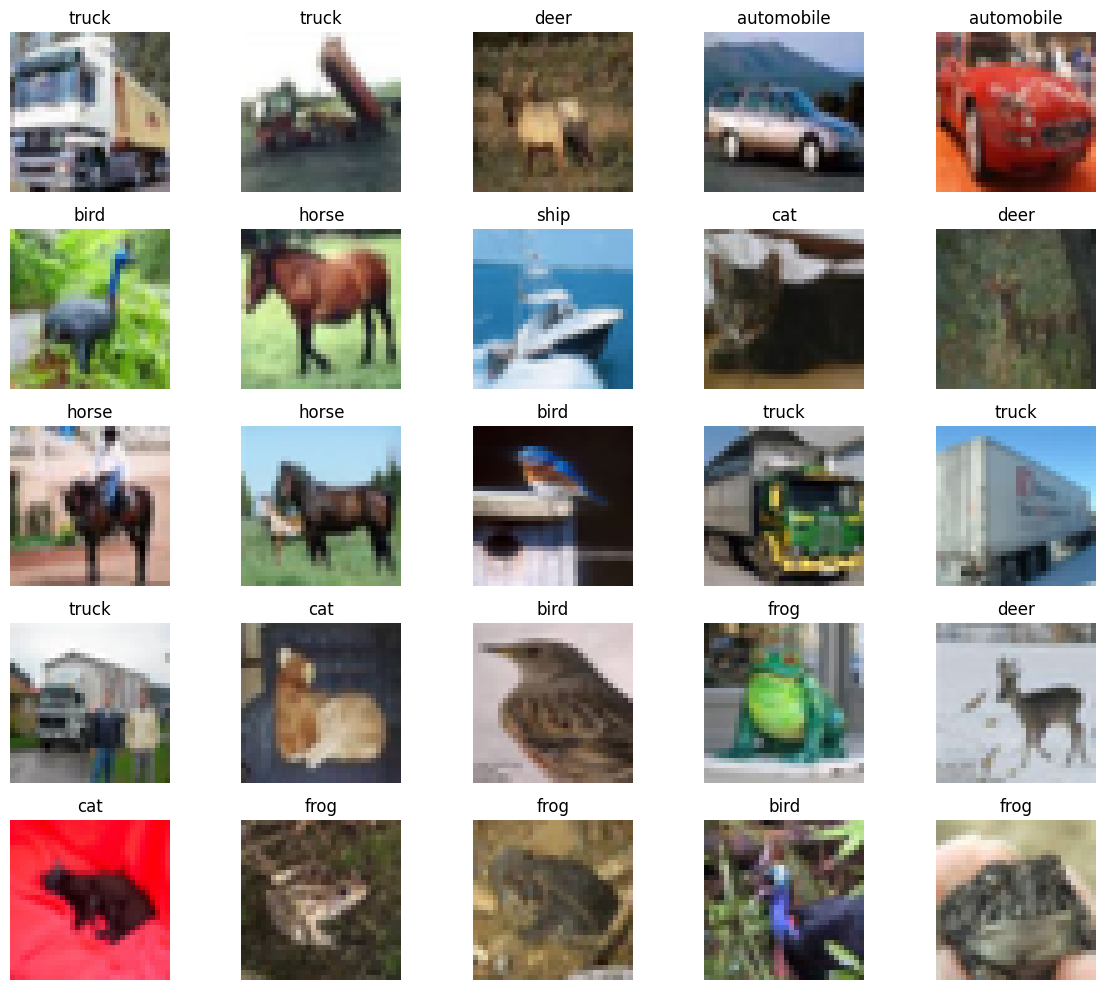

In [5]:
visualize_images(sample,(5,5))

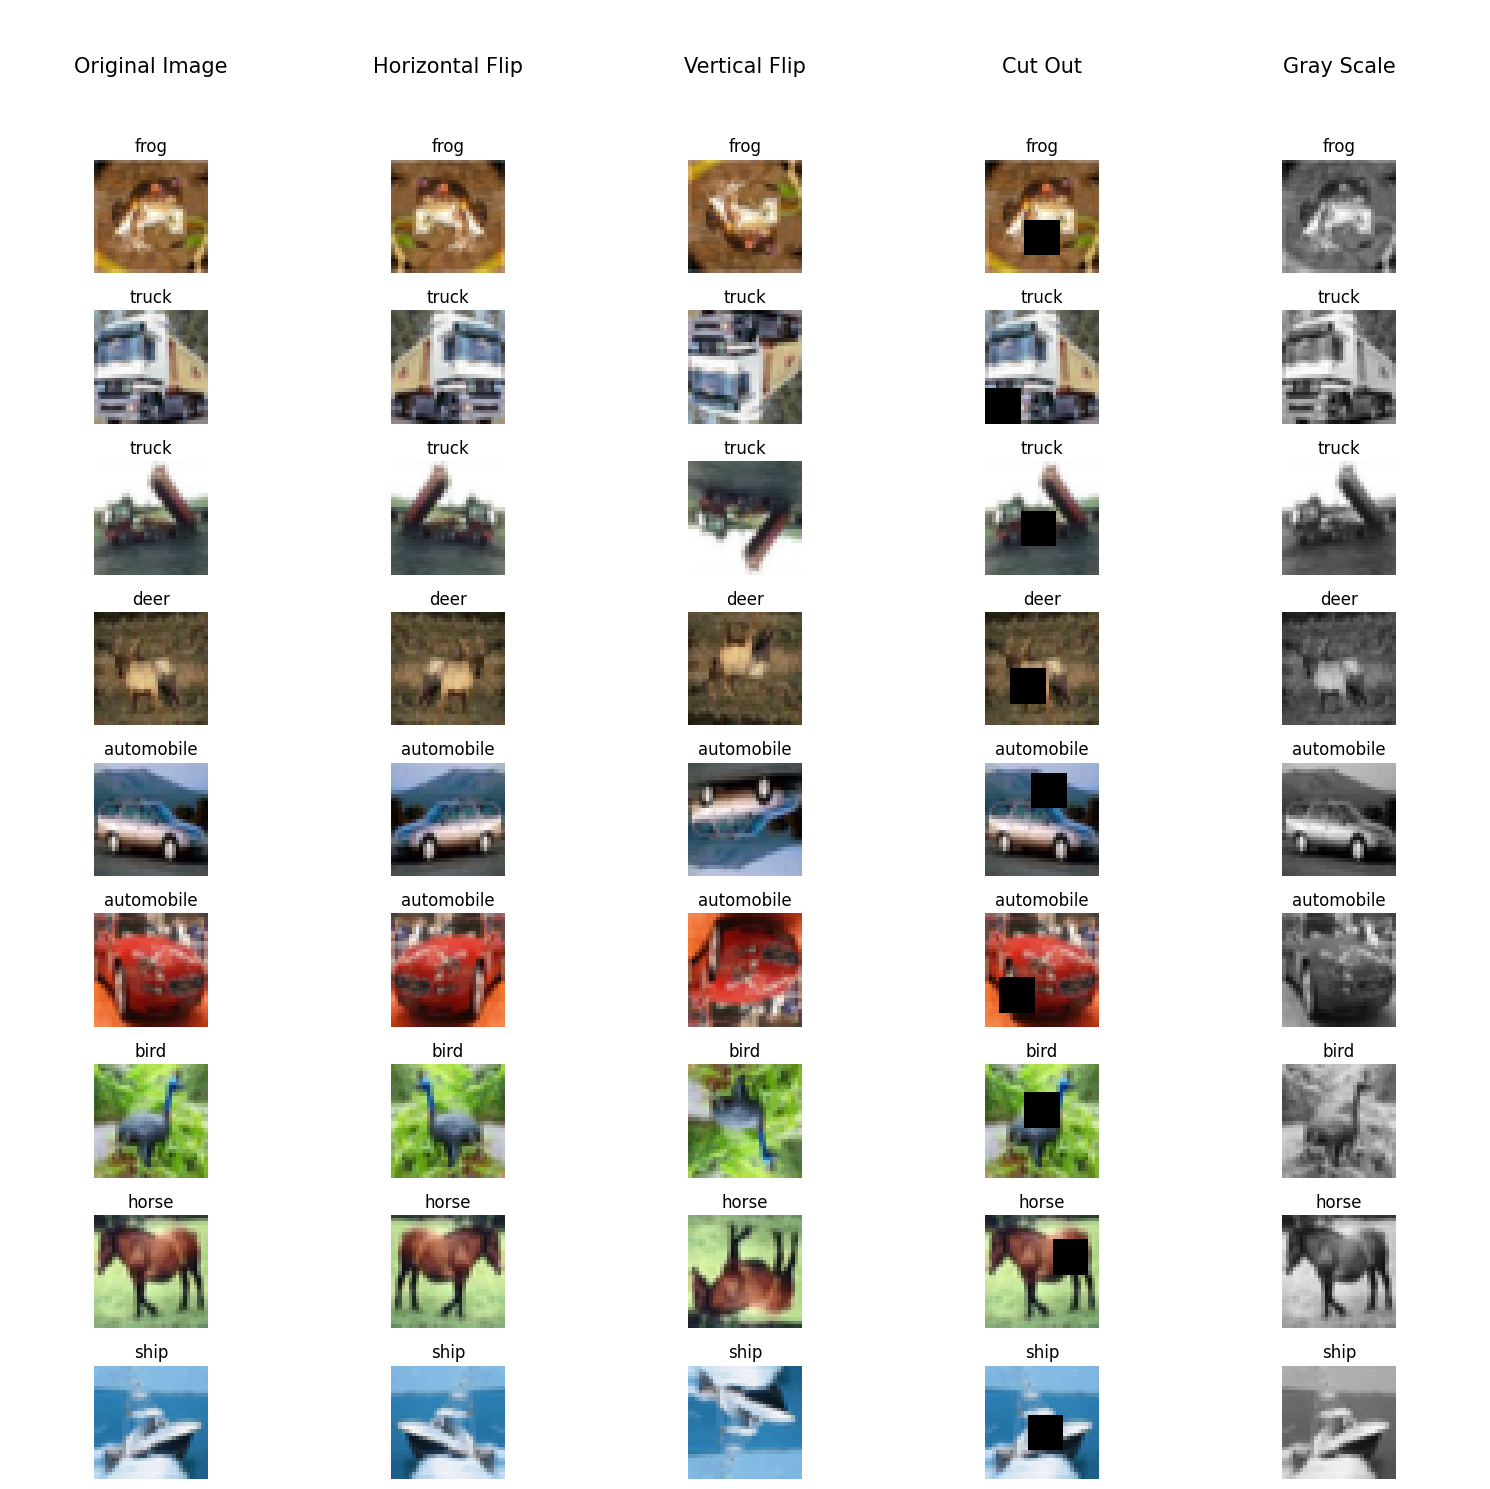

In [6]:
aug_details = {
    'Original Image': None,
    'Horizontal Flip': A.HorizontalFlip(always_apply=True),
    'Vertical Flip': A.VerticalFlip(always_apply=True),
    'Cut Out': A.CoarseDropout(max_holes=1, max_height=10, max_width=10, min_holes=1, min_height=10,
                               min_width=10, fill_value=0.473363, mask_fill_value=None, always_apply=True),
    'Gray Scale': A.ToGray(always_apply=True)
}

visualize_augmentated_images(sample,aug_details)

In [7]:
train_data = datasets.CIFAR10(root='./data', train=True,
                                        download=True )
test_data = datasets.CIFAR10(root='./data', train=False,
                                       download=True)


train_loader = torch.utils.data.DataLoader(AlbumentationImageDataset(train_data,(0.49139968, 0.48215841, 0.44653091),(0.24703223, 0.24348513, 0.26158784),train=True), batch_size=32,
                                          shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(AlbumentationImageDataset(test_data,(0.49139968, 0.48215841, 0.44653091),(0.24703223, 0.24348513, 0.26158784),train=False), batch_size=32,
                                          shuffle=False, num_workers=1)

Files already downloaded and verified
Files already downloaded and verified


In [8]:
model = Net(norm_type="ln").to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 32, 32]             270
              ReLU-2           [-1, 10, 32, 32]               0
         GroupNorm-3           [-1, 10, 32, 32]              20
           Dropout-4           [-1, 10, 32, 32]               0
            Conv2d-5           [-1, 20, 32, 32]           1,800
              ReLU-6           [-1, 20, 32, 32]               0
         GroupNorm-7           [-1, 20, 32, 32]              40
           Dropout-8           [-1, 20, 32, 32]               0
            Conv2d-9           [-1, 10, 34, 34]             200
             ReLU-10           [-1, 10, 34, 34]               0
        GroupNorm-11           [-1, 10, 34, 34]              20
          Dropout-12           [-1, 10, 34, 34]               0
        MaxPool2d-13           [-1, 10, 17, 17]               0
           Conv2d-14           [-1, 18,

In [9]:
training_parameters = {"learning_rate":0.01,
                       "momentum":0.7,
                       "max_lr":0.015,
                       "num_epochs":20
                       }
train_losses, test_losses, train_acc, test_acc = fit_model(model,training_parameters,train_loader,test_loader,device)

Adjusting learning rate of group 0 to 6.0000e-04.
Epoch 1


Train: Loss=1.7467 Batch_id=1562 Accuracy=28.23: 100%|██████████| 1563/1563 [00:31<00:00, 50.05it/s]


Test set: Average loss: 1.6348, Accuracy: 3999/10000 (39.99%)

Adjusting learning rate of group 0 to 6.0000e-04.
Epoch 2


Train: Loss=1.7396 Batch_id=1562 Accuracy=39.14: 100%|██████████| 1563/1563 [00:29<00:00, 52.78it/s]


Test set: Average loss: 1.4365, Accuracy: 4810/10000 (48.10%)

Adjusting learning rate of group 0 to 6.0000e-04.
Epoch 3


Train: Loss=1.5969 Batch_id=1562 Accuracy=44.17: 100%|██████████| 1563/1563 [00:28<00:00, 54.00it/s]


Test set: Average loss: 1.3711, Accuracy: 5075/10000 (50.75%)

Adjusting learning rate of group 0 to 6.0000e-04.
Epoch 4


Train: Loss=1.5608 Batch_id=1562 Accuracy=47.42: 100%|██████████| 1563/1563 [00:28<00:00, 54.67it/s]


Test set: Average loss: 1.1846, Accuracy: 5809/10000 (58.09%)

Adjusting learning rate of group 0 to 6.0001e-04.
Epoch 5


Train: Loss=1.2233 Batch_id=1562 Accuracy=50.05: 100%|██████████| 1563/1563 [00:28<00:00, 54.33it/s]


Test set: Average loss: 1.1533, Accuracy: 5913/10000 (59.13%)

Adjusting learning rate of group 0 to 6.0001e-04.
Epoch 6


Train: Loss=1.0641 Batch_id=1562 Accuracy=51.78: 100%|██████████| 1563/1563 [00:29<00:00, 52.63it/s]


Test set: Average loss: 1.0946, Accuracy: 6133/10000 (61.33%)

Adjusting learning rate of group 0 to 6.0001e-04.
Epoch 7


Train: Loss=1.2594 Batch_id=1562 Accuracy=53.30: 100%|██████████| 1563/1563 [00:28<00:00, 54.66it/s]


Test set: Average loss: 1.0580, Accuracy: 6307/10000 (63.07%)

Adjusting learning rate of group 0 to 6.0002e-04.
Epoch 8


Train: Loss=1.3938 Batch_id=1562 Accuracy=54.53: 100%|██████████| 1563/1563 [00:28<00:00, 54.18it/s]


Test set: Average loss: 1.0118, Accuracy: 6479/10000 (64.79%)

Adjusting learning rate of group 0 to 6.0003e-04.
Epoch 9


Train: Loss=1.1444 Batch_id=1562 Accuracy=55.67: 100%|██████████| 1563/1563 [00:29<00:00, 53.17it/s]


Test set: Average loss: 1.0213, Accuracy: 6457/10000 (64.57%)

Adjusting learning rate of group 0 to 6.0003e-04.
Epoch 10


Train: Loss=0.9963 Batch_id=1562 Accuracy=56.19: 100%|██████████| 1563/1563 [00:28<00:00, 54.60it/s]


Test set: Average loss: 0.9524, Accuracy: 6655/10000 (66.55%)

Adjusting learning rate of group 0 to 6.0004e-04.
Epoch 11


Train: Loss=0.9157 Batch_id=1562 Accuracy=57.45: 100%|██████████| 1563/1563 [00:28<00:00, 54.84it/s]


Test set: Average loss: 0.9481, Accuracy: 6696/10000 (66.96%)

Adjusting learning rate of group 0 to 6.0005e-04.
Epoch 12


Train: Loss=0.9368 Batch_id=1562 Accuracy=57.85: 100%|██████████| 1563/1563 [00:29<00:00, 53.72it/s]


Test set: Average loss: 0.9351, Accuracy: 6718/10000 (67.18%)

Adjusting learning rate of group 0 to 6.0006e-04.
Epoch 13


Train: Loss=1.7167 Batch_id=1562 Accuracy=58.26: 100%|██████████| 1563/1563 [00:28<00:00, 54.98it/s]


Test set: Average loss: 0.9328, Accuracy: 6777/10000 (67.77%)

Adjusting learning rate of group 0 to 6.0007e-04.
Epoch 14


Train: Loss=1.3175 Batch_id=1562 Accuracy=58.89: 100%|██████████| 1563/1563 [00:27<00:00, 55.90it/s]


Test set: Average loss: 0.9306, Accuracy: 6750/10000 (67.50%)

Adjusting learning rate of group 0 to 6.0008e-04.
Epoch 15


Train: Loss=0.7500 Batch_id=1562 Accuracy=59.42: 100%|██████████| 1563/1563 [00:29<00:00, 53.79it/s]


Test set: Average loss: 0.9433, Accuracy: 6717/10000 (67.17%)

Adjusting learning rate of group 0 to 6.0009e-04.
Epoch 16


Train: Loss=1.5185 Batch_id=1562 Accuracy=59.37: 100%|██████████| 1563/1563 [00:28<00:00, 54.30it/s]


Test set: Average loss: 0.9006, Accuracy: 6880/10000 (68.80%)

Adjusting learning rate of group 0 to 6.0010e-04.
Epoch 17


Train: Loss=1.1195 Batch_id=1562 Accuracy=60.02: 100%|██████████| 1563/1563 [00:28<00:00, 54.79it/s]


Test set: Average loss: 0.8610, Accuracy: 7023/10000 (70.23%)

Adjusting learning rate of group 0 to 6.0012e-04.
Epoch 18


Train: Loss=1.2186 Batch_id=1562 Accuracy=60.17: 100%|██████████| 1563/1563 [00:28<00:00, 54.10it/s]


Test set: Average loss: 0.8588, Accuracy: 7022/10000 (70.22%)

Adjusting learning rate of group 0 to 6.0013e-04.
Epoch 19


Train: Loss=0.8595 Batch_id=1562 Accuracy=60.69: 100%|██████████| 1563/1563 [00:29<00:00, 53.50it/s]


Test set: Average loss: 0.8694, Accuracy: 6978/10000 (69.78%)

Adjusting learning rate of group 0 to 6.0015e-04.
Epoch 20


Train: Loss=1.0761 Batch_id=1562 Accuracy=60.92: 100%|██████████| 1563/1563 [00:28<00:00, 55.15it/s]


Test set: Average loss: 0.8329, Accuracy: 7096/10000 (70.96%)

Adjusting learning rate of group 0 to 6.0016e-04.


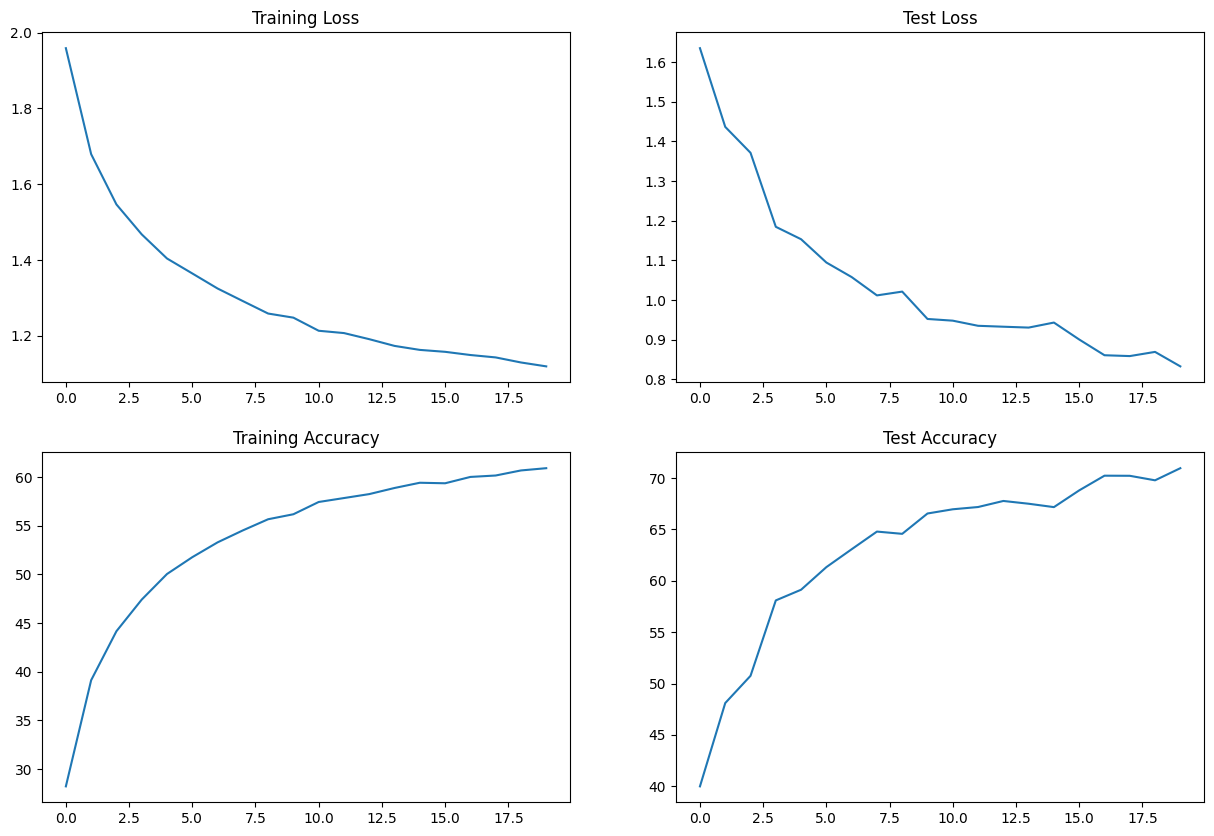

In [10]:
plot_accuracy_report(train_losses, test_losses, train_acc, test_acc)

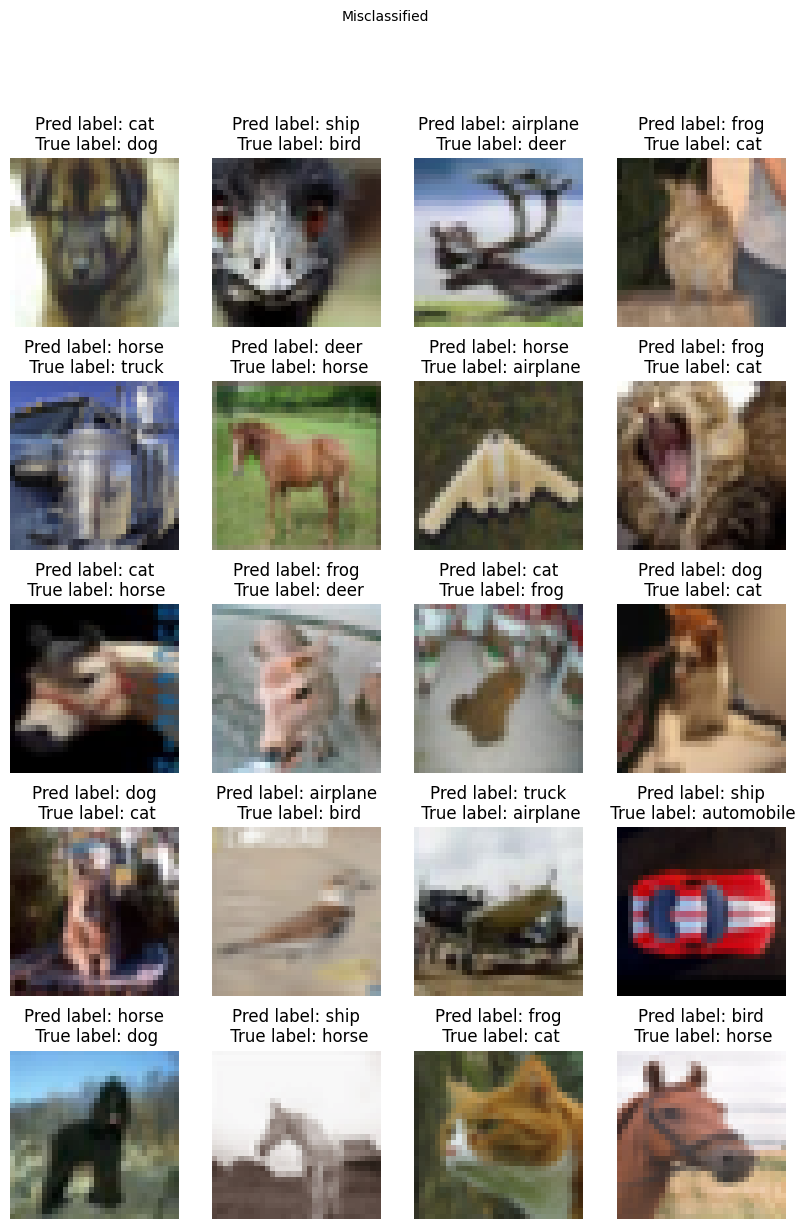

In [11]:
# from torchvision import transforms
# import matplotlib.pyplot as plt
# import numpy as np

grid_size = (4,4)
plot_misclassified(model,test_loader,test_data,device,mean,std)


Accuracy of airplane : 66 %

Accuracy of automobile : 88 %

Accuracy of  bird : 47 %

Accuracy of   cat : 44 %

Accuracy of  deer : 67 %

Accuracy of   dog : 63 %

Accuracy of  frog : 78 %

Accuracy of horse : 77 %

Accuracy of  ship : 87 %

Accuracy of truck : 81 %
{'airplane': 66.88741721854305, 'automobile': 88.29431438127091, 'bird': 47.916666666666664, 'cat': 44.8051948051948, 'deer': 67.91277258566979, 'dog': 63.89776357827476, 'frog': 78.61842105263158, 'horse': 77.88461538461539, 'ship': 87.93650793650794, 'truck': 81.875}


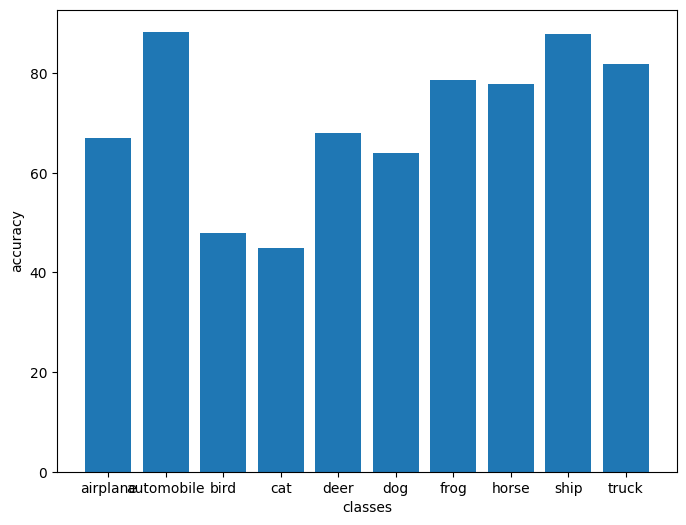

In [12]:
calculate_accuracy_per_class(model,device,test_loader,test_data)